### Preprocessing

In [1]:
# Basic packages
import pandas as pd 
import seaborn as sns
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pathlib import Path

C:\Users\Tarik\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def preprocess(data):
    data = data;
    def remove_punctuations(data = data):
        punct_tag=re.compile(r'[^\w\s]')
        data=punct_tag.sub(r'',data)
        return data

    #Removes HTML syntaxes
    def remove_html(data = data):
        html_tag=re.compile(r'<.*?>')
        data=html_tag.sub(r'',data)
        return data

    #Removes URL data
    def remove_url(data = data):
        url_clean= re.compile(r"https://\S+|www\.\S+")
        data=url_clean.sub(r'',str(data))
        url_clean= re.compile(r"http://\S+|www\.\S+")
        data=url_clean.sub(r'',data)
        return data

    #Removes Emojis
    def remove_emoji(data = data):
        emoji_clean= re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
        data=emoji_clean.sub(r'',data)
        url_clean= re.compile(r"https://\S+|www\.\S+")
        data=url_clean.sub(r'',data)
        return data
        
    #Lemmatize the corpus
    def lemma_traincorpus(data = data):
        lemmatizer=nltk.stem.WordNetLemmatizer()
        out_data=""
        for words in data:
            out_data+= lemmatizer.lemmatize(words)
        return out_data
  
    def remove_stopwords(data = data):
        new_stopwords = ["እኔ" ,"የእኔ" ,"እኔ ራሴ" ,"እኛ" ,"የእኛ" ,"የእኛ" ,"እኛ ራሳችን" ,
                            "አንቺ" ,"ያንተ" ,"ራስህን" ,"እራሳችሁ" ,"እሱ" ,"የእሱ" ,"ራሱ" ,
                            "እሷ" ,"የእሷ" ,"እራሷ" ,"እነሱ" ,"እነሱን" ,"የእነሱ" ,"ራሳቸው" ,
                            "ምንድን" ,"የትኛው" ,"የአለም ጤና ድርጅት" ,"ማን" ,"ይህ" ,"የሚል ነው" ,
                            "እነዚህ" ,"እነዚያ" ,"ነኝ" ,"ነው" ,"ናቸው" ,"ነበር" ,"ነበሩ" ,"ሁን" ,"ቆይቷል" ,
                            "መሆን" ,"አላቸው" ,"አለው" ,"ነበረው" ,"ያለው" ,"መስራት" ,"ያደርጋል" ,"አደረገ" ,
                            "ማድረግ" ,"አንድ" ,"የ" ,"እና" ,"ግን" ,"ከሆነ" ,"ወይም" ,"ምክንያቱም" ,"እንደ" ,
                            "እስከ" ,"እያለ" ,"የ" ,"ለ" ,"ጋር" ,"ስለ" ,"ላይ" ,"መካከል" ,"ወደ" ,"በኩል" ,"ወቅት" ,
                            "ከዚህ በፊት" ,"በኋላ" ,"ከላይ" ,"ከታች" ,"ወደከ" ,"ወደ ላይ" ,"ታች" ,"ውስጥ" ,"ውጭ" ,
                            "ላይ" ,"ጠፍቷል" ,"በላይ" ,"በታች" ,"እንደገና" ,"ተጨማሪ" ,"ከዚያ" ,"አንድ ጊዜ" ,"እዚህ" ,
                            "እዚያ" ,"መቼ" ,"የት" ,"እንዴት" ,"እንዴት" ,"ሁሉም" ,"ማንኛውም" ,"ሁለቱም" ,"እያንዳንዳቸው" ,
                            "ጥቂቶች" ,"ተጨማሪ" ,"በጣም" ,"ሌላ" ,"አንዳንድ" ,"እንደዚህ" ,"አይ" ,"ወይም አይደለም" ,"አይደለም" ,
                            "ብቻ" ,"የራሱ" ,"ተመሳሳይ" ,"ስለዚህ" ,"ይልቅ" ,"እንዲሁ" ,"በጣም" ,"እ.ኤ.አ." ,"ት" ,"ይችላል" ,
                            "ያደርጋል" ,"ብቻ" ,"ዶን" ,"ይገባል" ,"አሁን"]
        stopwords_list = nltk.corpus.stopwords.words('english')
        stopwords_list.extend(new_stopwords)
        print(stopwords_list)
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def remove_mentions(input_text):
        return re.sub(r'@\w+', '', str(input_text))
    
    def normalize_char_level_missmatch(input_text):
        rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_text)
        rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
        rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
        rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
        rep5=re.sub('[ሕኅ]','ህ',rep4)
        rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
        rep7=re.sub('[ሠ]','ሰ',rep6)
        rep8=re.sub('[ሡ]','ሱ',rep7)
        rep9=re.sub('[ሢ]','ሲ',rep8)
        rep10=re.sub('[ሣ]','ሳ',rep9)
        rep11=re.sub('[ሤ]','ሴ',rep10)
        rep12=re.sub('[ሥ]','ስ',rep11)
        rep13=re.sub('[ሦ]','ሶ',rep12)
        rep14=re.sub('[ዓኣዐ]','አ',rep13)
        rep15=re.sub('[ዑ]','ኡ',rep14)
        rep16=re.sub('[ዒ]','ኢ',rep15)
        rep17=re.sub('[ዔ]','ኤ',rep16)
        rep18=re.sub('[ዕ]','እ',rep17)
        rep19=re.sub('[ዖ]','ኦ',rep18)
        rep20=re.sub('[ጸ]','ፀ',rep19)
        rep21=re.sub('[ጹ]','ፁ',rep20)
        rep22=re.sub('[ጺ]','ፂ',rep21)
        rep23=re.sub('[ጻ]','ፃ',rep22)
        rep24=re.sub('[ጼ]','ፄ',rep23)
        rep25=re.sub('[ጽ]','ፅ',rep24)
        rep26=re.sub('[ጾ]','ፆ',rep25)
        #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
        rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
        rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
        rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
        rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
        rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
        rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
        rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
        rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
        rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
        rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
        rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
        rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
        rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
        rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
        rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
        rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
        rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
        rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
        rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
        rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
        rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
        rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
        
        return rep48
    
     #replacing any existance of special character or punctuation to null  
    def remove_punc_and_special_chars(input_text): # puct in amh =፡።፤;፦፧፨፠፣ 
        normalized_text = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',input_text) 
        return normalized_text
    
    #remove all ascii characters and Arabic and Amharic numbers
    def remove_ascii_and_numbers(input_text):
        rm_num_and_ascii=re.sub('[A-Za-z0-9]','',input_text)
        return re.sub('[\'\u1369-\u137C\']+','',rm_num_and_ascii)
    
    
    data.Posts = df.Posts.apply(remove_url).apply(remove_html).apply(remove_mentions).apply(remove_punctuations).apply(remove_emoji).apply(remove_punc_and_special_chars).apply(remove_ascii_and_numbers).apply(normalize_char_level_missmatch)
    
    return data

In [4]:
def dataPreapare(path='dataset.csv'): #read from csv
    df = pd.read_csv(path)
    df = df[['Posts', 'Label']]
    return df

In [5]:
df = dataPreapare()
preprocess(df)

,Posts,Label
0,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...,Free
1,ጃዋር አልበግዳዲ በግርግር ስልጣን ለመያዝ የሚያደርገው ነገር ብዙ ስራ ፈ...,Offensive
2,ምን ሆናችሁ ኦርቶዶክሶች ሰሞኑን ፖለቲካ ገባ እንዴ ውስጣችኋይዟችሁ ወደ...,Free
3,ስለ አሳምነው የምትፅፈው ነገር አሳምነው ለአማራ የነበረው ተቆርቋሪነት አ...,Free
4,አጋጣሚውን ተጠቅመው የእስክንድር ነጋን ስም እና ትግል ለማዳከም የሚፈልጉ...,Offensive
...,...,...
5725,ኦህዴድ እራሱ ባመጣዉ ቀዉስ ተናዉጦ መዉጫ ቀዳዳ እየፈለገ ነዉ,Offensive
5726,ኦሮሞ ሀገር መምራት አይችልም,Offensive
5727,ሲማረኩ በሚሰጡት አትታለሉ ማርኮ ከማብላት መረሸን ይቀላል ትግሬ ጎረ...,Offensive
5728,በኦሮሞ የተሞሉ ሴገጤዎች የወሎ ኦሮሞን ምንም ስሌ የማያውቅን ህዝብ ...,Offensive


In [6]:
df.to_csv('preprocessed.csv')

### Data Visualization

In [7]:
data = pd.read_csv('preprocessed.csv')
data = data[['Posts', 'Label']]

In [8]:
data.sample(5)

,Posts,Label
5287,ጠቅላይ ሚንስትራችን የተከበሩ የአሰሎጠሚዶኮ አቢይ አህመድ የጎረቤት ሀገር...,Free
5483,በሀገራችን ላይን ኳስ ማንከባለል ውጤት አይሆንምን,Free
1674,ትግስት ፍራቻ ለመሰለው እብርተኛ የአማራ ተሰፊፍ ለእብርቱ ማሰተንፋሸ ውን...,Offensive
2912,ሌላው ወሬ የመከላከያ አባላት የመማረክ ጉዳይ ነው ከመቀሌ ደሴ ድረስ በ...,Free
2961,መባረኪያ መስቀል ብር,Free


In [9]:
data.shape

(5730, 2)

In [10]:
data['Label'].value_counts()

Free         3041
Offensive    2689
Name: Label, dtype: int64

In [11]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
data['Label'] = label_encoder.fit_transform(data['Label'])

In [11]:
data

,Posts,Label
0,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...,Free
1,ጃዋር አልበግዳዲ በግርግር ስልጣን ለመያዝ የሚያደርገው ነገር ብዙ ስራ ፈ...,Offensive
2,ምን ሆናችሁ ኦርቶዶክሶች ሰሞኑን ፖለቲካ ገባ እንዴ ውስጣችኋይዟችሁ ወደ...,Free
3,ስለ አሳምነው የምትፅፈው ነገር አሳምነው ለአማራ የነበረው ተቆርቋሪነት አ...,Free
4,አጋጣሚውን ተጠቅመው የእስክንድር ነጋን ስም እና ትግል ለማዳከም የሚፈልጉ...,Offensive
...,...,...
5725,ኦህዴድ እራሱ ባመጣዉ ቀዉስ ተናዉጦ መዉጫ ቀዳዳ እየፈለገ ነዉ,Offensive
5726,ኦሮሞ ሀገር መምራት አይችልም,Offensive
5727,ሲማረኩ በሚሰጡት አትታለሉ ማርኮ ከማብላት መረሸን ይቀላል ትግሬ ጎረ...,Offensive
5728,በኦሮሞ የተሞሉ ሴገጤዎች የወሎ ኦሮሞን ምንም ስሌ የማያውቅን ህዝብ ...,Offensive


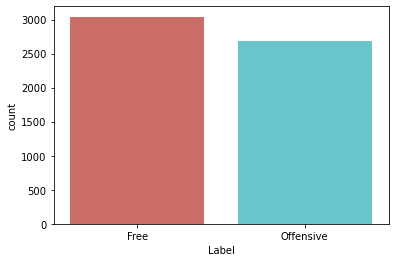

In [12]:
sns.countplot(x='Label',data=data,palette='hls')
plt.show()

In [14]:
all_text = data ['Posts']

In [15]:
all_text

0       እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደረ...
1       ጃዋር አልበግዳዲ በግርግር ስልጣን ለመያዝ የሚያደርገው ነገር ብዙ ስራ ፈ...
2        ምን ሆናችሁ ኦርቶዶክሶች ሰሞኑን ፖለቲካ ገባ እንዴ ውስጣችኋይዟችሁ ወደ...
3       ስለ አሳምነው የምትፅፈው ነገር አሳምነው ለአማራ የነበረው ተቆርቋሪነት አ...
4       አጋጣሚውን ተጠቅመው የእስክንድር ነጋን ስም እና ትግል ለማዳከም የሚፈልጉ...
                              ...                        
5725        ኦህዴድ እራሱ ባመጣዉ ቀዉስ ተናዉጦ መዉጫ ቀዳዳ     እየፈለገ ነዉ  
5726                                   ኦሮሞ ሀገር መምራት አይችልም
5727    ሲማረኩ በሚሰጡት  አትታለሉ  ማርኮ ከማብላት መረሸን ይቀላል  ትግሬ ጎረ...
5728     በኦሮሞ  የተሞሉ ሴገጤዎች የወሎ ኦሮሞን ምንም ስሌ  የማያውቅን ህዝብ ...
5729    ኮሮና ቫይረስ ኢትዮጵያ ገባ እያሉ  ሲንጫጩ ስታይ አረ ፈታ በሉ ከቫይረሱ...
Name: Posts, Length: 5730, dtype: object

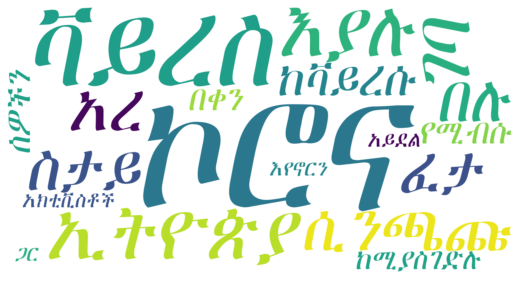

In [16]:
from wordcloud import WordCloud
comment_words = ' '

# iterate through the csv file 
for val in data.Posts: 
  
   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 
      
for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(font_path='jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(comment_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()